### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
data = pd.read_csv('https://github.com/wrp/bmlai/blob/a99edb39c8d675a13dee1fab1c2076f7b79c6796/5.1/data/coupons.csv?raw=true')

In [ ]:
data.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
6829,No Urgent Place,Kid(s),Sunny,80,10AM,Coffee House,2h,Male,26,Married partner,...,less1,less1,1~3,less1,1,0,0,0,1,1
8893,No Urgent Place,Alone,Rainy,55,10AM,Coffee House,1d,Male,26,Unmarried partner,...,less1,4~8,1~3,less1,1,1,0,0,1,1
699,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,36,Unmarried partner,...,never,4~8,gt8,less1,1,0,0,0,1,1
4261,No Urgent Place,Alone,Sunny,80,10AM,Bar,1d,Female,26,Single,...,never,4~8,1~3,less1,1,0,0,0,1,1
11315,Home,Partner,Sunny,30,6PM,Restaurant(<20),1d,Male,36,Unmarried partner,...,1~3,gt8,gt8,1~3,1,1,1,0,1,1
3964,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Female,21,Single,...,1~3,gt8,1~3,1~3,1,0,0,0,1,1
6426,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Married partner,...,gt8,4~8,gt8,1~3,1,1,1,0,1,1
7114,No Urgent Place,Friend(s),Snowy,30,10PM,Carry out & Take away,1d,Male,31,Married partner,...,less1,4~8,4~8,less1,1,1,0,0,1,1
7900,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,26,Married partner,...,gt8,4~8,4~8,less1,1,1,1,0,1,0
6340,Work,Alone,Sunny,80,7AM,Coffee House,2h,Female,36,Divorced,...,gt8,gt8,gt8,1~3,1,1,0,1,0,0


2. Investigate the dataset for missing or problematic data.

In [ ]:
data.info()
print(data.CoffeeHouse.value_counts())
print(data.Restaurant20To50.value_counts())
print(data.CarryAway.value_counts())
print(data.Bar.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
# Drop the 'car' column; it is not documented and contains many null entries
d = data.drop(axis=1, columns='car')

# Replace nulls with "never" in the columns  Bar, CoffeeHouse, 
# CarryAway, RestaurantLessThan20, Restaurant20To50   
for col in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
  d[col].fillna('never', inplace=True)

# Now discard all na
d = d.dropna()

print("After replacing nulls with 'never' in select columns, we have discarded")
discarded = len(data) - len(d)
print("%d rows, and 1 column"%(discarded))
  

After replacing nulls with 'never' in select columns, we have discarded
0 rows, and 1 column


4. What proportion of the total observations chose to accept the coupon? 



In [ ]:
counts = d.Y.value_counts()
def accept_rate(d):
  s = d.Y.value_counts()
  return s[1] / (s[0] + s[1])

def accept_rate_percent(d):
  '''Return a prettified string showing accept rate as a percentage'''
  return '%.2f%%' % (100 * accept_rate(d))

print(f'{counts[1]} users ({accept_rate_percent(d)}) accepted the coupon')

7210 users (56.84%) accepted the coupon


5. Use a bar plot to visualize the `coupon` column.

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64


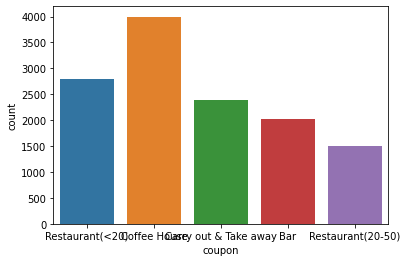

In [ ]:

print(d.coupon.value_counts())
sns.countplot(data=d, x='coupon')

6. Use a histogram to visualize the temperature column.

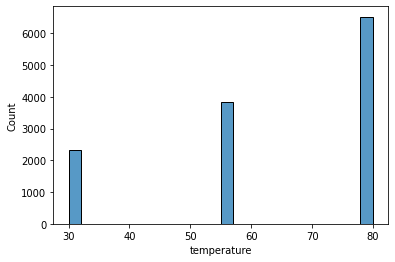

In [ ]:
sns.histplot(d, x='temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
b = d.loc[d['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [ ]:

print(f'{accept_rate_percent(b)} of the bar coupons were accepted')  # 41%



41.00% of the bar coupons were accepted


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [ ]:
b3f = b.loc[b['Bar'].isin(['never', '1~3', 'less1'])]
b3m = b.loc[b['Bar'].isin(['gt8', '4~8'])]  


print(f'Accept rate for those who visited a bar fewer than 3 times a month: {accept_rate_percent(b3f)}')  # 37%
print(f'Accept rate for those who visited a bar more than 3 times a month: {accept_rate_percent(b3m)}')  # 77%

Accept rate for those who visited a bar fewer than 3 times a month: 37.07%
Accept rate for those who visited a bar more than 3 times a month: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [ ]:
t = b.loc[~b['Bar'].isin(['less1', 'never'])]
a = t.loc[~t['age'].isin(['21', 'below21'])]

print(f'accept rate for drivers over the age of 25 who visit a bar at least once a month:', end=' ')
print(f'{accept_rate_percent(a)}')

accept rate for drivers over the age of 25 who visit a bar at least once a month: 69.52%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [ ]:
a = t.loc[(t.passanger != 'Kid(s)') & (t.occupation != 'Farming Fishing & Forestry')]

print('The acceptance rate for drivers who visit bars with passengers that are not kids')
print(f'and whose occupation is not farming, fishing, or forestry: {accept_rate_percent(a)}')

The acceptance rate for drivers who visit bars with passengers that are not kids
and whose occupation is not farming, fishing, or forestry: 71.32%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [ ]:

a = t.loc[(t.passanger != 'Kid(s)') & (t.maritalStatus != 'Widowed')]
print(f'Acceptence rate for bar goers with non child passengers that are not widowed {accept_rate(a)}')

a = t.loc[(t.age == 'below21') | (t.age == '21') | (t.age == '26')]

print(f'Acceptance rate for bar goers under age 30: {accept_rate(a)}')


a = d.loc[
        data.RestaurantLessThan20.isin(['4~8','gt8']) & 
        data.income.isin(['Less than $12500', '$25000 - $37499','$12500 - $24999', '$37500 - $49999'])
]


print(f'Acceptance rate for visitors to cheap resaurants with income < 50K: {accept_rate_percent(a)}')


Acceptence rate for bar goers with non child passengers that are not widowed 0.7132486388384754
Acceptance rate for bar goers under age 30: 0.7217391304347827
Acceptance rate for visitors to cheap resaurants with income < 50K: 60.07%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Young drivers without children are far more likely to accept the coupon!

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:

accept_rates = pd.Series(dtype=float)
x = d
def compute_ratio(s):
  '''Compute the ratio of acceptance rate for rows that match a filter
  vs. those that do not from the dataFrame specified in the global x'''
  global x
  a = accept_rate(x.loc[s])
  b = accept_rate(x.loc[~s])
  return a/b
  
accept_rates['alone-partnered'] = compute_ratio(x.passanger.isin(['Alone', 'Partner']))
accept_rates['alone'] = compute_ratio(x.passanger.isin(['Alone']))

for col in x.columns:
    for c in x[col].unique():
        try:
            accept_rates['_'.join((col, c))] = compute_ratio(x[col].isin([c]))
        except (TypeError, KeyError):
            pass


print(accept_rates.sort_values(ascending=False).head(5))
print('...')
print(accept_rates.sort_values(ascending=False).tail(5))

coupon_Carry out & Take away    1.388772
coupon_Restaurant(<20)          1.335676
weather_Sunny                   1.273867
passanger_Friend(s)             1.266966
education_Some High School      1.261731
dtype: float64
...
weather_Rainy               0.798538
expiration_2h               0.792825
CoffeeHouse_never           0.767024
coupon_Restaurant(20-50)    0.753340
coupon_Bar                  0.685200
dtype: float64


From the above, we see that 'Carry out & Take away' coupons are the most likely to be accepted, while `Bar` coupons are least likely.  Coupons at cheap restaurants are likely to be used, and soon to expire coupons are also likely to be used.  When the weather is sunny, coupons are more likely to be used.